<a href="https://colab.research.google.com/github/pattyhumemills/pattyhumemills.github.io/blob/master/TextMining%20COVID%20tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' 
This function connects to Twitter using user tokens and secret keys
from twitter for authentication
'''
import tweepy
import os
import tweepy as tw
import pandas as pd
import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# put the authorization codes here from your Twitter developer application
consumer_key=''
consumer_secret=''
access_token=''
access_token_secret=''

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
# Define the search term and the date_since date as variables
search_words = "#covid"
new_search = search_words + " -filter:retweets"
date_since = "2020-02-16"

In [ ]:
# Collect tweets, https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/
all_tweets = []
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="en",
              since=date_since).items(1500)
            #until = date_until
all_tweets = [tweet.text for tweet in tweets]
all_tweets[:3]

#saving the tweets into a csv
from pandas import DataFrame
df1 = DataFrame (all_tweets,columns=['tweets'])
df1.to_csv('set1-1500-Sentiment.csv')

In [ ]:
#from google.colab import files
#uploaded = files.upload()
import pandas as pd
reviews = pd.read_csv('set1-1500-Sentiment.csv', encoding='latin1')

for index, row in reviews.iterrows():
  review = row['tweets']
  http_link = re.findall('http\S+', review) # find all http links
  www_link = re.findall('www\S+', review) # find all www links
 # if http or www links are found save them in a separate column
  indHttp = 0
  if len(http_link)>0:
    for i in http_link:
      colname = 'httpLinks' + str(indHttp)
      reviews.loc[index,colname] = i
      indHttp = indHttp+1
  indWww = 0
  if len(www_link)>0:
    for i in http_link:
      colname = 'httpLinks' + str(indWww)
      reviews.loc[index,colname] = i
      indWww = indWww+1
  
  #replacing links, non alphabets and double spaces
  review = re.sub('http\S+'," ", review) #replace http links with a space
  review = re.sub('www\S+'," ", review) #replace www links with a space
  review = re.sub('[^a-zA-Z]'," ", review) #replace non alphabets with space
  review = re.sub('  '," ", review) #replace non alphabets with space
  reviews.loc[index,'tweets'] = review.strip() #remove any leading and trailing spaces
  
reviews.to_csv('cleaned-Sentiments.csv')  

FileNotFoundError: ignored

In [ ]:
##Using labeled data - labeledSentimentsTwitterData - manually retained 120 'other' category reviews
#removed the reviews with no category
#labeled_raw = pd.read_csv('labeledSentimentsTwitterData.csv', encoding='latin1')
labeled_raw = pd.read_csv('labeledSentimentsTwitterData.csv', encoding='latin1')
labeled_raw = labeled_raw[['tweets','Category']]
labeled_raw["Category"] = labeled_raw["Category"].str.lower()
labeled_raw = labeled_raw.drop_duplicates() # removing duplicates
#labeled_raw = labeled_raw.reset_index



In [ ]:
labeled_raw["Category"].unique()

array(['preventative', 'research', 'other', 'economic impact',
       'treatments', 'policy', 'testing', 'statistics'], dtype=object)

In [ ]:
labeled_raw = labeled_raw.reset_index()

In [ ]:
#making a list of tweets
review_list = labeled_raw['tweets'].tolist()


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

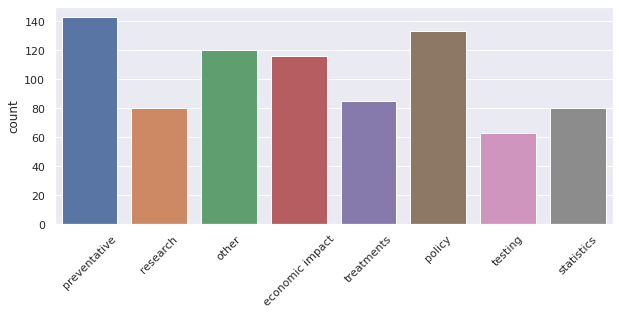

In [ ]:
#EDA
category = labeled_raw['Category'].tolist()

sns.set()
f, ax = plt.subplots(figsize=(10, 4))
sns.countplot(category)
plt.xticks(rotation=45)

In [ ]:
from nltk.stem.porter import PorterStemmer

STEMMER=PorterStemmer()

# Use NLTK's PorterStemmer in a function
def MY_STEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [STEMMER.stem(word) for word in words]
    return words
#TfidfVectorizer
MyTfidfVect=TfidfVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_STEMMER,
                        lowercase = True
                        )

#Creating a sparse matrix and a DF for tfidf vectorizer
MyTfidfModel=MyTfidfVect.fit_transform(review_list)
cols_tfidf = MyTfidfVect.get_feature_names()
DTM_Tfidf = MyTfidfModel.toarray()
DF_tfidf=pd.DataFrame(DTM_Tfidf,columns=cols_tfidf) # vectorized df
#
print(DF_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

      ab  abbott  abc  abcadelaid  abcnew  ...  zev  zimbabw  zinc  zombi  zone
0    0.0     0.0  0.0         0.0     0.0  ...  0.0      0.0   0.0    0.0   0.0
1    0.0     0.0  0.0         0.0     0.0  ...  0.0      0.0   0.0    0.0   0.0
2    0.0     0.0  0.0         0.0     0.0  ...  0.0      0.0   0.0    0.0   0.0
3    0.0     0.0  0.0         0.0     0.0  ...  0.0      0.0   0.0    0.0   0.0
4    0.0     0.0  0.0         0.0     0.0  ...  0.0      0.0   0.0    0.0   0.0
..   ...     ...  ...         ...     ...  ...  ...      ...   ...    ...   ...
815  0.0     0.0  0.0         0.0     0.0  ...  0.0      0.0   0.0    0.0   0.0
816  0.0     0.0  0.0         0.0     0.0  ...  0.0      0.0   0.0    0.0   0.0
817  0.0     0.0  0.0         0.0     0.0  ...  0.0      0.0   0.0    0.0   0.0
818  0.0     0.0  0.0         0.0     0.0  ...  0.0      0.0   0.0    0.0   0.0
819  0.0     0.0  0.0         0.0     0.0  ...  0.0      0.0   0.0    0.0   0.0

[820 rows x 3069 columns]


In [ ]:
########## Remove all columns with numbers and words<3 -----------------
for nextcol in DF_tfidf.columns:
    if(re.search(r'[^A-Za-z]+', nextcol)):
      DF_tfidf=DF_tfidf.drop([nextcol], axis=1)
#    ## The following will remove any column with name and length <=3
    elif(len(str(nextcol))<=3 ): #retaining the word flu
      if ((str(nextcol) != 'flu') ):
        DF_tfidf=DF_tfidf.drop([nextcol], axis=1)

DF_tfidf.shape #(820, 2667)

(820, 2667)

In [ ]:
DF_tfidf[45:60]

,abbott,abcadelaid,abcnew,abil,abou,abov,abpoli,abroad,absolut,abus,academ,accept,access,accessori,accor,accord,account,accur,accuraci,acknowledg,aclu,acta,action,actionaidindia,activ,actor,actress,actual,adapt,addit,additivemanufactur,address,adjiedjbaka,administ,administr,admir,admiss,admit,adopt,advers,...,wors,worship,worst,worth,wrap,write,wrong,wrongli,wuhan,wyggroup,wythallnew,wythallpark,xenophob,xenophobia,yahoo,yahoonew,yale,yall,yathinkn,yatra,yeah,year,yell,yesterday,yike,yole,yolobu,yougov,young,yourselv,yout,youth,yvettecoopermp,zealand,zelenkoprotocol,zero,zimbabw,zinc,zombi,zone
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.378628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3422,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.364619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329573,0.329573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

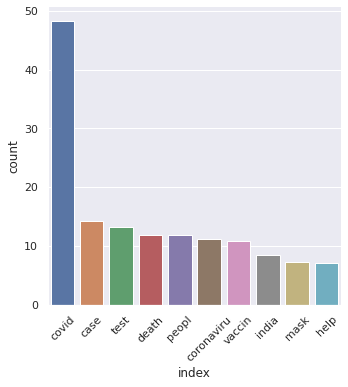

In [ ]:
##Using almost uniform dataset

colSum = DF_tfidf.sum(axis=0)
vocab1 = colSum.sort_values(ascending = False)
top10freq = vocab1[:10]
top10freq = top10freq.to_frame().reset_index()
top10freq = top10freq.rename(columns= {0: 'count'})
top10freq.index.name = 'index'
#top 10 frequent
chart1 = sns.catplot(x="index", y="count", kind="bar", data = top10freq)
plt.xticks(rotation=45)
DF_tfidf['label'] = labeled_raw['Category']

In [ ]:

## Create the testing set - grab a sample from the training set. 
from sklearn.model_selection import train_test_split

TrainDF, TestDF = train_test_split(DF_tfidf, test_size=0.3)
#print (TrainDF)
#print (TestDF)

## SEPERATING LABELS 
TestLabels=TestDF["label"]
TrainLabels=TrainDF["label"]
## remove labels
TestDF = TestDF.drop(["label"], axis=1)
TrainDF=TrainDF.drop(["label"], axis=1)


In [ ]:
TrainLabels

11              policy
534             policy
693       preventative
61     economic impact
97             testing
            ...       
433    economic impact
651         statistics
517         treatments
406         treatments
117         treatments
Name: label, Length: 574, dtype: object

SVM

---



SVM

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM prediction:
 ['statistics' 'policy' 'research' 'policy' 'testing' 'preventative'
 'policy' 'policy' 'treatments' 'treatments' 'policy' 'preventative'
 'other' 'other' 'other' 'other' 'preventative' 'policy' 'policy'
 'statistics' 'other' 'treatments' 'preventative' 'economic impact'
 'policy' 'preventative' 'preventative' 'policy' 'policy' 'policy'
 'research' 'other' 'research' 'statistics' 'preventative' 'preventative'
 'preventative' 'policy' 'economic impact' 'economic impact' 'policy'
 'treatments' 'statistics' 'economic impact' 'testing' 'research'
 'economic impact' 'statistics' 'preventative' 'policy' 'statistics'
 'statistics' 'testing' 'other' 'policy' 'economic impact' 'research'
 'preventative' 'other' 'economic impact' 'economic impact' 'other'
 'research' 'preventative' 'treatments' 'testing' 'preventative' 'other'
 'preventative' 'testing' 'policy' 'policy' 'preventative' 'preventative'
 'policy' 'policy' 'policy' 'testing' 'other' 'treatments' 'preventative'
 'preve

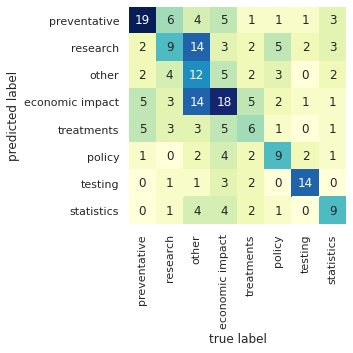

In [ ]:
#############################################
###########  SVM ############################
#############################################
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
SVM_Model1=LinearSVC(C=1000)
SVM_Model1.fit(TrainDF, TrainLabels)

SVM_pred1=SVM_Model1.predict(TestDF)
print("SVM prediction:\n", SVM_pred1)
print("Actual:")
print(TestLabels)

cnf_matrixS = confusion_matrix(TestLabels, SVM_pred1)
print("The confusion matrix is:")
print(cnf_matrixS)

# print classification report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Accuracy\n")
print(SVM_Model1.score(TestDF, TestLabels)) # Accuracy = 0.4146

from sklearn.metrics import confusion_matrix
# confusion matrix
mat = confusion_matrix(TestLabels, SVM_pred1)
#confusion_matrix(TestLabels, SVM_pred1)
print (mat)
#sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt = 'd')
sns.heatmap(mat, square=True, annot=True, cmap='YlGnBu', cbar=False,
xticklabels=['preventative', 'research', 'other', 'economic impact',
       'treatments', 'policy', 'testing', 'statistics'], yticklabels=['preventative', 'research', 'other', 'economic impact',
       'treatments', 'policy', 'testing', 'statistics'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


[LibSVM]SVM prediction:
 ['policy' 'policy' 'policy' 'policy' 'testing' 'preventative' 'policy'
 'policy' 'treatments' 'policy' 'policy' 'policy' 'other' 'policy' 'other'
 'other' 'preventative' 'policy' 'policy' 'policy' 'other' 'policy'
 'preventative' 'economic impact' 'policy' 'preventative' 'preventative'
 'policy' 'policy' 'policy' 'policy' 'other' 'research' 'preventative'
 'preventative' 'preventative' 'preventative' 'policy' 'economic impact'
 'economic impact' 'policy' 'treatments' 'policy' 'economic impact'
 'testing' 'research' 'economic impact' 'preventative' 'preventative'
 'policy' 'policy' 'statistics' 'testing' 'other' 'policy'
 'economic impact' 'research' 'preventative' 'other' 'economic impact'
 'economic impact' 'other' 'policy' 'preventative' 'treatments' 'testing'
 'preventative' 'research' 'policy' 'policy' 'policy' 'policy'
 'preventative' 'preventative' 'policy' 'policy' 'policy' 'testing'
 'other' 'treatments' 'preventative' 'preventative' 'other' 'policy'
 '

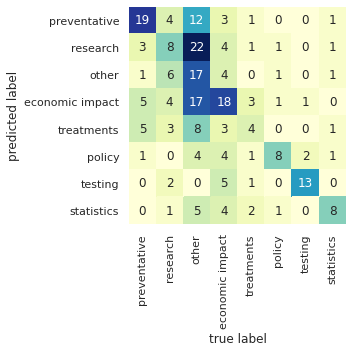

In [ ]:
#############################################
###########  SVM Radial kernel ############################
#############################################
from sklearn.metrics import confusion_matrix
SVM_Model2=sklearn.svm.SVC(C=5000, kernel='rbf', verbose=True, gamma="auto")
SVM_Model2.fit(TrainDF, TrainLabels)

SVM_pred2=SVM_Model2.predict(TestDF)
print("SVM prediction:\n", SVM_pred2)
print("Actual:")
print(TestLabels)

cnf_matrixS = confusion_matrix(TestLabels, SVM_pred2)
print("The confusion matrix is:")
print(cnf_matrixS)

# print classification report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Accuracy\n")
print(SVM_Model2.score(TestDF, TestLabels)) # Accuracy = 0.41

from sklearn.metrics import confusion_matrix
# confusion matrix
mat = confusion_matrix(TestLabels, SVM_pred2)
#confusion_matrix(TestLabels, SVM_pred1)
print (mat)
#sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt = 'd')
sns.heatmap(mat, square=True, annot=True, cmap='YlGnBu', cbar=False,
xticklabels=['preventative', 'research', 'other', 'economic impact',
       'treatments', 'policy', 'testing', 'statistics'], yticklabels=['preventative', 'research', 'other', 'economic impact',
       'treatments', 'policy', 'testing', 'statistics'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
research = pd.DataFrame(data = [SVM_pred2,TestLabels ])
research.to_csv("result_rbf.csv")

[LibSVM]SVM prediction:
 ['policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'other' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'preventative' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy' 'policy'
 'policy' 'policy' 'policy' 'p

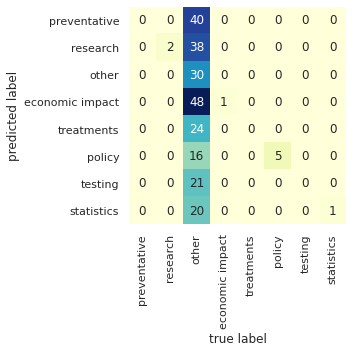

In [ ]:
#############################################
###########  SVM polynomial kernel ############################
#############################################
from sklearn.metrics import confusion_matrix
SVM_Model3=sklearn.svm.SVC(C=1000, kernel='poly', degree=1.2,verbose=True, gamma="auto")
SVM_Model3.fit(TrainDF, TrainLabels)

SVM_pred3=SVM_Model3.predict(TestDF)
print("SVM prediction:\n", SVM_pred3)
print("Actual:")
print(TestLabels)

cnf_matrixS = confusion_matrix(TestLabels, SVM_pred3)
print("The confusion matrix is:")
print(cnf_matrixS)

# print classification report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Accuracy\n")
print(SVM_Model3.score(TestDF, TestLabels)) # Accuracy = 0.19(degree = 1.7)

from sklearn.metrics import confusion_matrix
# confusion matrix
mat = confusion_matrix(TestLabels, SVM_pred3)
#confusion_matrix(TestLabels, SVM_pred1)
print (mat)
#sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt = 'd')
sns.heatmap(mat, square=True, annot=True, cmap='YlGnBu', cbar=False,
xticklabels=['preventative', 'research', 'other', 'economic impact',
       'treatments', 'policy', 'testing', 'statistics'], yticklabels=['preventative', 'research', 'other', 'economic impact',
       'treatments', 'policy', 'testing', 'statistics'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

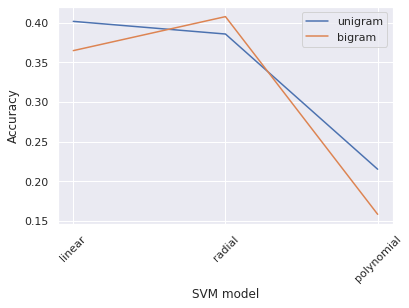

In [ ]:
models = ["linear", "radial", "polynomial"]
unigram = [0.402, 0.386, 0.215]
bigram = [0.365, 0.408, 0.158]
# Looking at incorrect predictions
plt.plot(models, unigram)
plt.plot(models, bigram)
plt.xlabel("SVM model")
plt.ylabel("Accuracy")
plt.legend(['unigram',"bigram"]) 
plt.xticks(rotation=45)




# COVID Word Cloud


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import nltk
import pandas as pd
import sklearn
import re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
import seaborn as sns
import textblob
from textblob import TextBlob
import numpy as np
import requests
from PIL import Image
import json
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

In [ ]:
tweettext = " ".join(tweet for tweet in labeled_raw.tweets)
print ("There are {} words in the combination of all tweets.".format(len(tweettext)))
covid_mask = np.array(Image.open("/content/drive/My Drive/coronavirus.png")) # Shilpa, I will need to send you the png and have you add it in. Right now it is in my google drive which I can't connect to yours.
covid_mask
image_colors = ImageColorGenerator(covid_mask)
wc = WordCloud(background_color="white", max_words=500, mask=covid_mask, stopwords=STOPWORDS,
               max_font_size=90, random_state=42, contour_width=3, contour_color='firebrick',colormap = "magma")
wc.generate(tweettext)
plt.figure(figsize=[20,20])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import nltk
import string
import os, sys, email,re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Latent Dirichlet Allocation -- All categories

In [ ]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(["covid","coronavirus","COVID","realdonaldtrump","senatemajldr",'th',"amp","don","trump","kamalaharris","narendramodi","ve"])
print(my_stop_words)
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=my_stop_words)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(labeled_raw['tweets'])

frozenset({'since', 'beside', 'mine', 'whether', 'even', 'get', 'five', 'system', 'call', 'cry', 'because', 'co', 'keep', 'around', 'namely', 'each', 'everyone', 'everything', 'has', 'two', 'an', 'sometime', 'and', 'the', 'together', 'there', 'also', 'besides', 'whence', 'seeming', 'seem', 'due', 'mostly', 'inc', 'something', 'were', 'among', 'anywhere', 'ie', 'been', 'these', 'i', 'serious', 'don', 'too', 'until', 'themselves', 'thereby', 'thence', 'amoungst', 'some', 'do', 'along', 'whose', 'to', 'after', 'ltd', 'never', 'ourselves', 'put', 'etc', 'de', 'still', 'most', 'my', 'twelve', 'before', 'beforehand', 'how', 'off', 'become', 'hasnt', 'thereafter', 'amount', 'onto', 'up', 'she', 'by', 'into', 'whereupon', 'behind', 'between', 'only', 'take', 'your', 'under', 'or', 'herein', 'herself', 'more', 'nevertheless', 'show', 'give', 'six', 'then', 'least', 'ten', 'moreover', 'trump', 'neither', 'mill', 'cannot', 'seemed', 'this', 'whereas', 'name', 'towards', 'move', 'realdonaldtrump',

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 8
number_words = 10
# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=number_topics, max_iter=10, learning_method='online')
LDA_Model = lda_model.fit_transform(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_model, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
people cases deaths pandemic new india day update know need

Topic #1:
just mask open als science world did know vaccine wear

Topic #2:
government vaccine testing death like tests england tally russia medical

Topic #3:
test health months new based past staff look pakistan millions

Topic #4:
hospital states work shit cardiac office common add mind job

Topic #5:
face time safety safe lockdown need home masks schools lot

Topic #6:
americans daily keeping year way stop risk relief waiting offer

Topic #7:
fight administration cases response join today good read fda global


In [ ]:
!pip install pyldavis #ONE TIME PER SESSION!

In [ ]:
import pyLDAvis.sklearn as LDAvis
import pyLDAvis
panel = LDAvis.prepare(lda_model, count_data,count_vectorizer, mds='tsne')
pyLDAvis.display(panel)

In [ ]:
vocab = count_vectorizer.get_feature_names()
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(vocab)

plt.figure(figsize=[40,10])
#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 20

for t in range(number_topics):
    plt.subplot(1, number_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_features = model.fit_transform(LDA_Model)
df = pd.DataFrame(tsne_features)
df['topic'] = LDA_Model.argmax(axis=1)
df.columns = ['TSNE1', 'TSNE2', 'topic']

NameError: ignored

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('T-SNE plot of Covid-19 Tweets clustered by Topic')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', palette='magma' ,hue = 'topic', data = df, legend = 'full')
sns.set_style("dark")
plt.show()

# Latent Dirichlet Allocation for All Categories but Other

In [ ]:
labeled_raw_otherless = labeled_raw[labeled_raw.Category != 'other']
labeled_raw_otherless.head()

,index,tweets,Category
0,0,RDO is holding a staffmeeting while respecting...,preventative
1,1,Good opportunity for the speakers and research...,research
3,4,Watch this space for a Seminar on Covid at pm...,research
4,5,Please help here to feed the underprivilege...,economic impact
5,6,IndianArmy Honouring the spirit of our CoronaW...,preventative


In [ ]:
count_data2 = count_vectorizer.fit_transform(labeled_raw['tweets'])

NameError: ignored

In [ ]:
# Tweak the two parameters below
number_topics2 = 7
number_words = 10
# Create and fit the LDA model
lda_model2 = LatentDirichletAllocation(n_components=number_topics2, max_iter=10, learning_method='online')
LDA_Model2 = lda_model2.fit_transform(count_data2)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_model2, count_vectorizer, number_words)

In [ ]:
panel2 = LDAvis.prepare(lda_model2, count_data2,count_vectorizer, mds='tsne')
pyLDAvis.display(panel2)

In [ ]:
vocab2 = count_vectorizer.get_feature_names()
word_topic2 = np.array(lda_model2.components_)
#print(word_topic2)
word_topic2 = word_topic2.transpose()

num_top_words = 10
vocab_array2 = np.asarray(vocab2)

plt.figure(figsize=[40,10])
#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 20

for t in range(number_topics2):
    plt.subplot(1, number_topics2, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array2[top_words_idx]
    top_words_shares = word_topic2[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

plt.tight_layout()
plt.show()

In [ ]:
model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_features2 = model.fit_transform(LDA_Model2)
df2 = pd.DataFrame(tsne_features2)
df2['topic'] = LDA_Model2.argmax(axis=1)
df2.columns = ['TSNE1', 'TSNE2', 'topic']

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('T-SNE plot of Covid-19 Tweets clustered by Topic without Other')
ax2 = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', palette='magma' ,hue = 'topic', data = df2, legend = 'full')
sns.set_style("dark")
plt.show()

In [ ]:
vocab2 = count_vectorizer.get_feature_names()
word_topic2 = np.array(lda_model2.components_)
#print(word_topic2)
word_topic2 = word_topic2.transpose()

num_top_words = 10
vocab_array2 = np.asarray(vocab2)

plt.figure(figsize=[40,10])
#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 20

for t in range(number_topics2):
    plt.subplot(1, number_topics2, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array2[top_words_idx]
    top_words_shares = word_topic2[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

plt.tight_layout()
plt.show()

In [ ]:
model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_features2 = model.fit_transform(LDA_Model2)
df2 = pd.DataFrame(tsne_features2)
df2['topic'] = LDA_Model2.argmax(axis=1)
df2.columns = ['TSNE1', 'TSNE2', 'topic']

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('T-SNE plot of Covid-19 Tweets clustered by Topic without Other')
ax2 = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', palette='magma' ,hue = 'topic', data = df2, legend = 'full')
sns.set_style("dark")
plt.show()

# Multinomial Naive Bayes

In [ ]:
####### MNB  ######
## STEP 1: Instantiate MNB vectorizer, create dataframe from DTM
MyMnbVect = CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words = 'english',
                        tokenizer = MY_STEMMER,
                        lowercase = True
                        )

# Create a sparse matrix and a DF for MNB vectorizer
MyMnbModel = MyMnbVect.fit_transform(review_list)   # vectorize list
cols_Mnb = MyMnbVect.get_feature_names()	          # get column headers
DTM_Mnb = MyMnbModel.toarray()			                # create DTM
DF_Mnb = pd.DataFrame(DTM_Mnb,columns = cols_Mnb)   # vectorize DF
#
print(DF_Mnb)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

     ab  abbott  abc  abcadelaid  abcnew  ...  zev  zimbabw  zinc  zombi  zone
0     0       0    0           0       0  ...    0        0     0      0     0
1     0       0    0           0       0  ...    0        0     0      0     0
2     0       0    0           0       0  ...    0        0     0      0     0
3     0       0    0           0       0  ...    0        0     0      0     0
4     0       0    0           0       0  ...    0        0     0      0     0
..   ..     ...  ...         ...     ...  ...  ...      ...   ...    ...   ...
815   0       0    0           0       0  ...    0        0     0      0     0
816   0       0    0           0       0  ...    0        0     0      0     0
817   0       0    0           0       0  ...    0        0     0      0     0
818   0       0    0           0       0  ...    0        0     0      0     0
819   0       0    0           0       0  ...    0        0     0      0     0

[820 rows x 3069 columns]


In [ ]:
## STEP 2: Cleanse data (Remove columns with numbers and words <3 characters)
for nextcol in DF_Mnb.columns:
    if(re.search(r'[^A-Za-z]+', nextcol)):
      DF_Mnb = DF_Mnb.drop([nextcol], axis=1)

    # remove any column with name and length <=3
    elif(len(str(nextcol))<=3 ): #retaining the word flu
      if ((str(nextcol) != 'flu') ):
        DF_Mnb =DF_Mnb.drop([nextcol], axis=1)

DF_Mnb.shape 

(820, 2667)

In [ ]:
DF_Mnb['label'] = labeled_raw['Category']

In [ ]:
## STEP 3: Prepare train / test split for MNB
from sklearn.model_selection import train_test_split

# Create train / test split 
TrainDF_mnb, TestDFmnb = train_test_split(DF_Mnb, test_size=0.3)
TrainDF_mnb.shape
TestDFmnb.shape

# Separate labels 
TestLabels_mnb = TestDFmnb["label"]
TrainLabels_mnb = TrainDF_mnb["label"]

# remove labels
TestDFmnb = TestDFmnb.drop(["label"], axis=1)
TrainDF_mnb = TrainDF_mnb.drop(["label"], axis=1)

In [ ]:
TestDFmnb

,abbott,abcadelaid,abcnew,abil,abou,abov,abpoli,abroad,absolut,abus,academ,accept,access,accessori,accor,accord,account,accur,accuraci,acknowledg,aclu,acta,action,actionaidindia,activ,actor,actress,actual,adapt,addit,additivemanufactur,address,adjiedjbaka,administ,administr,admir,admiss,admit,adopt,advers,...,wors,worship,worst,worth,wrap,write,wrong,wrongli,wuhan,wyggroup,wythallnew,wythallpark,xenophob,xenophobia,yahoo,yahoonew,yale,yall,yathinkn,yatra,yeah,year,yell,yesterday,yike,yole,yolobu,yougov,young,yourselv,yout,youth,yvettecoopermp,zealand,zelenkoprotocol,zero,zimbabw,zinc,zombi,zone
461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
## STEP 4: Run MNB model; review output
from sklearn.naive_bayes import MultinomialNB

# Create the modeler
MyModelNB = MultinomialNB()

# Train the model
MyModelNB.fit(TrainDF_mnb, TrainLabels_mnb) 

# Run on test data; compare against actual data
Prediction_mnb = MyModelNB.predict(TestDFmnb)
print("The prediction from NB is:")
print(Prediction_mnb)
print("The actual labels are:")
print(TestLabels_mnb)

# Display prediction output in confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix_mnb = confusion_matrix(TestLabels_mnb, Prediction_mnb)

print("The MNB confusion matrix is:")
print(cnf_matrix_mnb)

# print classification report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Accuracy\n")
print(MyModelNB.score(TestDFmnb, TestLabels_mnb)) # Accuracy: 0.426


The prediction from NB is:
['other' 'policy' 'preventative' 'statistics' 'treatments' 'other'
 'research' 'economic impact' 'preventative' 'preventative' 'statistics'
 'treatments' 'economic impact' 'research' 'statistics' 'research'
 'preventative' 'testing' 'economic impact' 'economic impact'
 'preventative' 'preventative' 'policy' 'treatments' 'preventative'
 'other' 'other' 'statistics' 'economic impact' 'policy' 'other' 'other'
 'other' 'other' 'testing' 'policy' 'treatments' 'preventative' 'testing'
 'policy' 'testing' 'treatments' 'other' 'preventative' 'policy'
 'preventative' 'testing' 'economic impact' 'preventative' 'policy'
 'statistics' 'policy' 'statistics' 'preventative' 'statistics'
 'treatments' 'treatments' 'economic impact' 'statistics' 'policy'
 'policy' 'statistics' 'policy' 'preventative' 'preventative'
 'preventative' 'policy' 'policy' 'economic impact' 'statistics' 'policy'
 'other' 'policy' 'statistics' 'statistics' 'preventative' 'other'
 'preventative' 'other

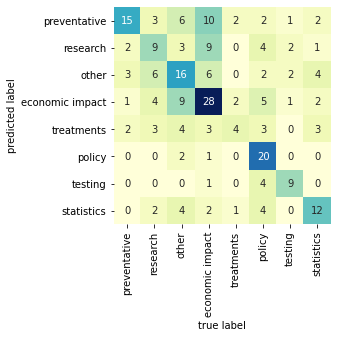

In [ ]:
## STEP 4a: make confusion matrix look better
import seaborn as sns

#sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt = 'd')
sns.heatmap(cnf_matrix_mnb, square=True, annot=True, cmap='YlGnBu', cbar=False,
xticklabels=['preventative', 'research', 'other', 'economic impact',
       'treatments', 'policy', 'testing', 'statistics'], yticklabels=['preventative', 'research', 'other', 'economic impact',
       'treatments', 'policy', 'testing', 'statistics'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


# **K-Means**

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import nltk
import string
import os, sys, email,re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(["covid","coronavirus","COVID","realdonaldtrump","senatemajldr",'th',"amp","don","trump","kamalaharris","narendramodi","ve"])
print(my_stop_words)

frozenset({'since', 'beside', 'mine', 'whether', 'even', 'get', 'five', 'system', 'call', 'cry', 'because', 'co', 'keep', 'around', 'namely', 'each', 'everyone', 'everything', 'has', 'two', 'an', 'sometime', 'and', 'the', 'together', 'there', 'also', 'besides', 'whence', 'seeming', 'seem', 'due', 'mostly', 'inc', 'something', 'were', 'among', 'anywhere', 'ie', 'been', 'these', 'i', 'serious', 'don', 'too', 'until', 'themselves', 'thereby', 'thence', 'amoungst', 'some', 'do', 'along', 'whose', 'to', 'after', 'ltd', 'never', 'ourselves', 'put', 'etc', 'de', 'still', 'most', 'my', 'twelve', 'before', 'beforehand', 'how', 'off', 'become', 'hasnt', 'thereafter', 'amount', 'onto', 'up', 'she', 'by', 'into', 'whereupon', 'behind', 'between', 'only', 'take', 'your', 'under', 'or', 'herein', 'herself', 'more', 'nevertheless', 'show', 'give', 'six', 'then', 'least', 'ten', 'moreover', 'trump', 'neither', 'mill', 'cannot', 'seemed', 'this', 'whereas', 'name', 'towards', 'move', 'realdonaldtrump',

In [ ]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = my_stop_words, #tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(labeled_raw['tweets'])
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [ ]:
tfidf_DF = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

In [ ]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self  


Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


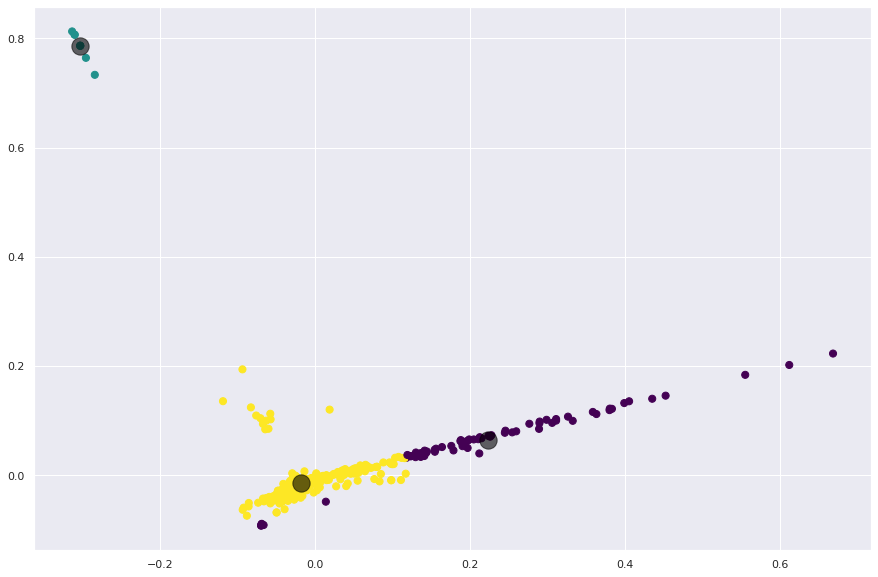

In [ ]:
plt.figure(figsize=(15,10))
sklearn_pca = PCA(n_components =10)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(3, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

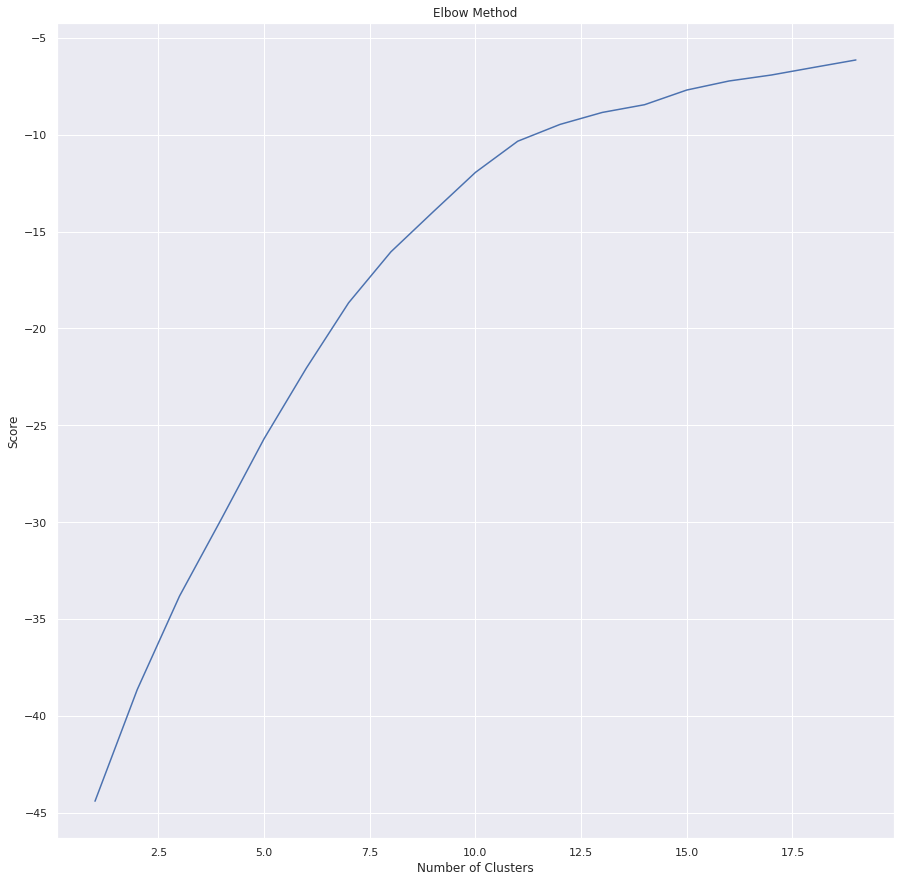

In [ ]:
plt.figure(figsize=(15,15))

number_clusters = range(1, 20)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

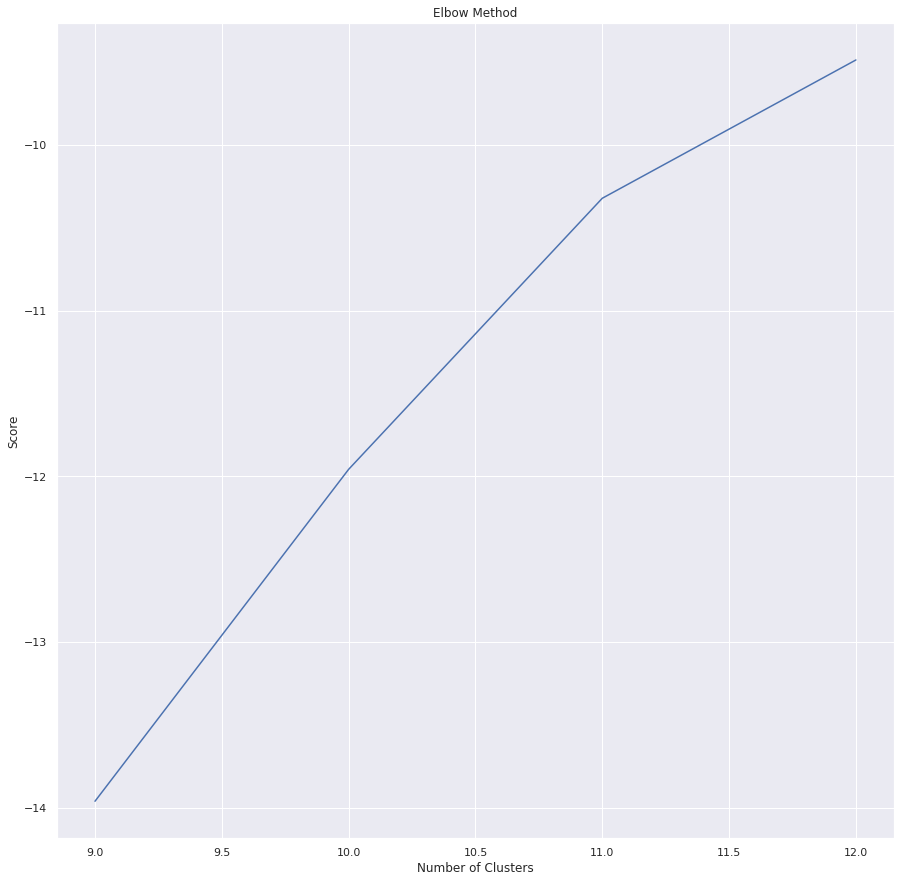

In [ ]:
plt.figure(figsize=(15,15))

number_clusters = range(9, 13)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 10)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=12, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
get_top_features_cluster(tf_idf_array, prediction, 5) 

In [ ]:
get_top_features_cluster(tf_idf_array, prediction, 5) 

[  features     score
 0  vaccine  0.291003
 1   russia  0.123972
 2  russian  0.058742
 3     says  0.051874
 4  vietnam  0.037370,   features     score
 0     need  0.007935
 1      new  0.007738
 2     test  0.006757
 3     just  0.006442
 4  testing  0.006317,        features     score
 0  disappointed  0.340021
 1         offer  0.333524
 2       waiting  0.333524
 3        relief  0.327645
 4     americans  0.317343,   features     score
 0   afraid  0.668420
 1  indians  0.334210
 2   people  0.211618
 3  working  0.206304
 4     hard  0.175016,   features     score
 0  quietly  0.334197
 1    drops  0.328125
 2  england  0.311003
 3    tally  0.297723
 4    tests  0.290274,     features     score
 0      cases  0.216683
 1     deaths  0.068164
 2        new  0.066005
 3     update  0.046381
 4  confirmed  0.039186,    features     score
 0    talked  0.305933
 1      nice  0.305933
 2  grandson  0.305933
 3      bits  0.305933
 4  negative  0.289061,     features     score
 0  

# Bernoulli Naive Bayes

In [ ]:
import nltk
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import re  
import seaborn as sns

# Bernoulli Count Vectorizer
BnVect = CountVectorizer('input='input='content',
                        analyzer = 'word',
                        stop_words = 'english',
                        lowercase = True,
                        tokenizer = MY_STEMMER,
                        binary=True
                        )

# Bernoulli Document Term Matrix
BnModel = BnVect.fit_transform(review_list)   
ColNames = BnVect.get_feature_names()         
transBn = BnModel.toarray()                
dfBn = pd.DataFrame(transBn,columns = ColNames)   


In [ ]:
# Clean Data: Remove Cols with numbrs and words < 3
for nextcol in dfBn.columns:
    if(re.search(r'[^A-Za-z]+', nextcol)):
        #print(nextcol)
        dfBn=dfBn.drop([nextcol], axis=1)
    elif(len(str(nextcol))<=3):
        #print(nextcol)
        dfBn=dfBn.drop([nextcol], axis=1)
#Clean Data: Change label, fill NaN with empty string
dfBn['label'] = labeled_raw['Category']
dfBn=dfBn.fillna('')

In [ ]:
# Split the primary dataframe to create training and esting Data,   
DFTrain, DFTest = train_test_split(dfBn, test_size=0.3)

# Create DataFrames 
TestLabels = DFTest["label"]
TrainLabels = DFTrain["label"]
DFTest = DFTest.drop(["label"], axis=1)
DFTrain = DFTrain.drop(["label"], axis=1)

In [ ]:
BernModel = BernoulliNB()
BernModel.fit(DFTrain, TrainLabels)
#BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

PredictionB=BernModel.predict(DFTest)

# Generate Confusion Matrix
confusionMatrix = confusion_matrix(TestLabels, PredictionB)
print("Bernoulli confusion matrix:\n")
print(confusionMatrix)

# Show Model Accuracy

print("Model Accuracy\n")
print(BernModel.score(DFTest, TestLabels))
print("\n")



*****End of Code*****